#Урок3

В этом уроке мы рассмотрим матрицу ошибок, выделим важные признаки, обсудим ограничения модели и вопросы справедливости. Используем модель логистической регрессии, чтобы не дублировать материал.

Матрица ошибок (Confusion matrix) — это таблица, которая показывает, как хорошо модель классифицирует данные. Она разбивает предсказания на 4 группы:

True Positive (TP) — модель правильно предсказала, что студент сдаст экзамен.

True Negative (TN) — модель правильно предсказала, что студент не сдаст экзамен.

False Positive (FP) — модель ошибочно предсказала, что студент сдаст, хотя он не сдал (ложноположительный результат).

False Negative (FN) — модель ошибочно предсказала, что студент не сдаст, хотя он сдал (ложноотрицательный результат).

Матрица помогает понять не только общую точность, но и типы ошибок, которые делает модель. Это важно для оценки качества модели, особенно если ошибки разного рода имеют разный "вес" в реальной жизни.

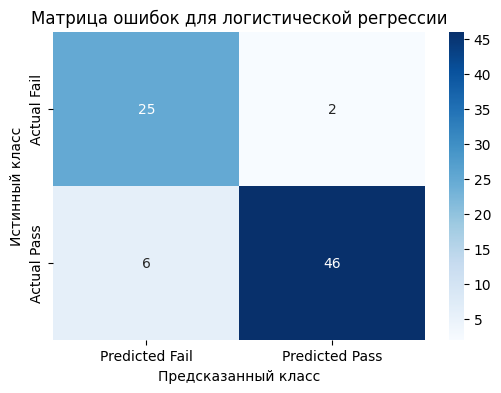

In [ ]:
from sklearn.metrics import confusion_matrix  #импортируем функцию для построения матрицы ошибок

# считаем матрицу ошибок на основе реальных и предсказанных значений
cm = confusion_matrix(y_test, pred_logreg)  #создаем матрицу ошибок для логистической регрессии

# создаем пустую фигуру для графика и задаем размер
plt.figure(figsize=(6,4))  #размер графика 6x4 дюйма

# строим тепловую карту матрицы ошибок
sns.heatmap(
    cm,  #передаем матрицу ошибок
    annot=True,  #подписи внутри ячеек
    fmt='d',  #формат чисел — целые числа
    cmap='Blues',  #цветовая схема: оттенки синего
    xticklabels=['Predicted Fail', 'Predicted Pass'],  #подписи оси X
    yticklabels=['Actual Fail', 'Actual Pass']  #подписи оси Y
)

plt.xlabel('Предсказанный класс')  #подпись оси X
plt.ylabel('Истинный класс')  #подпись оси Y
plt.title('Матрица ошибок для логистической регрессии')  #заголовок графика
plt.show()  #показать график


Важные признаки  (Important features) — это те характеристики (например, время на учебу, количество пропусков занятий), которые сильнее всего влияют на предсказание модели.

Если модель «говорит», что время, потраченное на учебу, сильно влияет на успех, значит этот признак важен.

Анализ важных признаков помогает понять, какие факторы действительно влияют на результат (экзамен сдан или нет).

Это полезно для интерпретации модели и принятия решений (например, выделить больше времени на занятия для студентов с низкой успеваемостью).

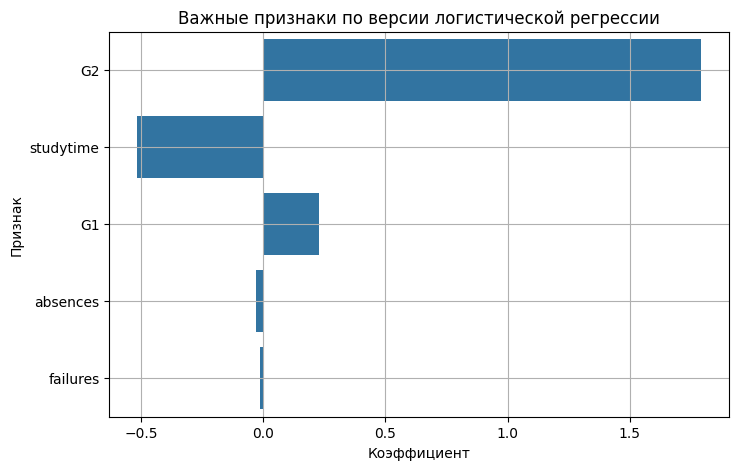

In [ ]:
# получаем коэффициенты модели логистической регрессии
coefficients = logreg.coef_[0]  #коэффициенты модели (влияние признаков)

# создаем DataFrame с признаками и их коэффициентами
feature_names = X.columns  #названия признаков
coef_df = pd.DataFrame({'Признак': feature_names, 'Коэффициент': coefficients})

# сортируем по абсолютному значению коэффициента (чтобы увидеть самые сильные влияния)
coef_df['Абсолютное значение'] = coef_df['Коэффициент'].abs()  #модуль значения
coef_df = coef_df.sort_values(by='Абсолютное значение', ascending=False)

# визуализируем
plt.figure(figsize=(8, 5))  #размер графика
sns.barplot(x='Коэффициент', y='Признак', data=coef_df)  #горизонтальная диаграмма
plt.title('Важные признаки по версии логистической регрессии')  #заголовок
plt.xlabel('Коэффициент')  #ось X
plt.ylabel('Признак')  #ось Y
plt.grid(True)  #добавляем сетку
plt.show()  #показываем график


Ограничения модели (Model limitations) — это ситуации, в которых модель может работать плохо или ошибаться. Например, если в данных мало примеров для определённой группы студентов, модель может хуже предсказывать их результаты. Модель может не учитывать важные факторы (здоровье, настроение, поддержка семьи), которых нет в данных.

Справедливость (fairness) модели — важно проверить, не дискриминирует ли модель определённые группы студентов (по полу, возрасту, социальному статусу). Если модель систематически хуже предсказывает для одной группы — это несправедливо и требует исправления. Обсуждение ограничений и справедливости помогает сделать модель более этичной и полезной.

Давайти проанализируем нашу модель! Ограничения модели

* **Линейность:**
  Логистическая регрессия предполагает линейную зависимость между признаками и логарифмом шансов. В наших данных некоторые признаки (например, `studytime`) имеют отрицательные коэффициенты, что может означать сложные взаимосвязи, которые модель не всегда адекватно улавливает.

* **Интерпретация коэффициентов:**
  Коэффициенты признаков, таких как оценки, могут иметь большой разброс — например, оценка 2 даёт сильный положительный эффект, а оценка 1 — слабый положительный. Это может означать, что модель чувствительна к деталям данных, но при этом возможны переобучение или недоучет других факторов.

* **Ошибки классификации:**
  Матрица ошибок показывает, что 25 человек действительно завалили (правильно классифицированы), 46 — правильно сдали, но при этом 2 человека, которые должны были сдать, модель классифицировала как заваливших, и 6 — наоборот. Это указывает на наличие ошибок второго рода и первого рода, которые могут быть критичны в учебном процессе.

* **Чувствительность к несбалансированности:**
  Если в выборке есть дисбаланс по классам (больше сдавших или заваливших), модель может хуже справляться с меньшим классом, что проявляется в ошибках классификации.

Вопросы справедливости

* **Риски предвзятости:**
  Если в данных есть характеристики, связанные с социальными или демографическими факторами (например, количество пропусков, которые могут зависеть от условий студента), модель может косвенно дискриминировать студентов из неблагоприятных условий.

* **Неявные предубеждения:**
  Признаки, которые выглядят нейтральными, например `absences` (пропуски), могут отражать социально-экономические факторы. Без дополнительного анализа модель может усиливать существующие неравенства.

Как можно улучшить результат?

* Использовать более сложные модели (например, деревья решений или ансамбли), способные улавливать нелинейные зависимости.
* Проводить балансировку классов (oversampling/undersampling) для уменьшения ошибок на миноритарных классах.
* Анализировать влияние признаков на разные группы студентов, чтобы выявить и смягчить возможные предвзятости.
* Включать экспертное мнение и дополнительные признаки, отражающие контекст студентов, чтобы повысить справедливость и качество прогнозов.

На этом наш урок закончен. Внимательно изучайте урок, ищите информацию самостоятельно и не бойтесь задачать вопросы. Встретимся на четвертом уроке.